In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import pickle
import seaborn as sns

In [20]:
def powerlaw_exponent(eigspec: np.ndarray) -> float:
    start, end = 0, np.log10(len(eigspec))
    eignum = np.logspace(start, end, num=50).round().astype(int)
    eigspec = eigspec[eignum - 1]
    logeignum = np.log10(eignum)
    logeigspec = np.log10(eigspec)

    # remove infs when eigenvalues are too small
    filter_ = ~np.isinf(logeigspec)
    logeignum = logeignum[filter_]
    logeigspec = logeigspec[filter_]
    linear_fit = LinearRegression().fit(logeignum.reshape(-1, 1), logeigspec)
    alpha = -linear_fit.coef_.item()
    return alpha, linear_fit.intercept_



def plot_eigspec(data, model):
      
    a, y = powerlaw_exponent(data)
    sns.lineplot(x=np.arange(1,len(data)+1),y=data/(10**y),label=f'model = {model}, alpha = {round(a,2)}')
    #plt.bar(np.arange(1,len(data)+1),data,label=f'alpha = {round(a,2)}')
    plt.xscale('log')
    plt.yscale('log')
    plt.legend()

def plot_ref(data):
    a, y = powerlaw_exponent(data)
    idx = np.arange(0,len(data))
    sns.lineplot(x=idx, y=1/idx, label='reference') 
    plt.xscale('log')
    plt.yscale('log')  
    plt.legend()

In [59]:
import numpy as np

def rescale_pca_variance(principal_components):
    """
    Rescales the variance of principal components to decay as a power law with a -1 index.

    Args:
    principal_components (numpy.ndarray): A 2D array where each column represents a principal component.

    Returns:
    numpy.ndarray: A 2D array of rescaled principal components.
    """
    # Number of components
    num_components = principal_components.shape[1]

    # Calculate the original variances
    original_variances = np.var(principal_components, axis=0)

    # Determine the constant C as the variance of the first component
    C = original_variances[0]

    # Calculate the scaling factors for each component
    scaling_factors = np.sqrt(C / np.arange(1, num_components + 1))

    # Rescale each principal component
    rescaled_components = principal_components * scaling_factors

    return rescaled_components

/tmp/ipykernel_36926/2158441035.py:6: RuntimeWarning: divide by zero encountered in log10
  logeigspec = np.log10(eigspec)


ValueError: Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required by LinearRegression.

<Figure size 640x480 with 0 Axes>

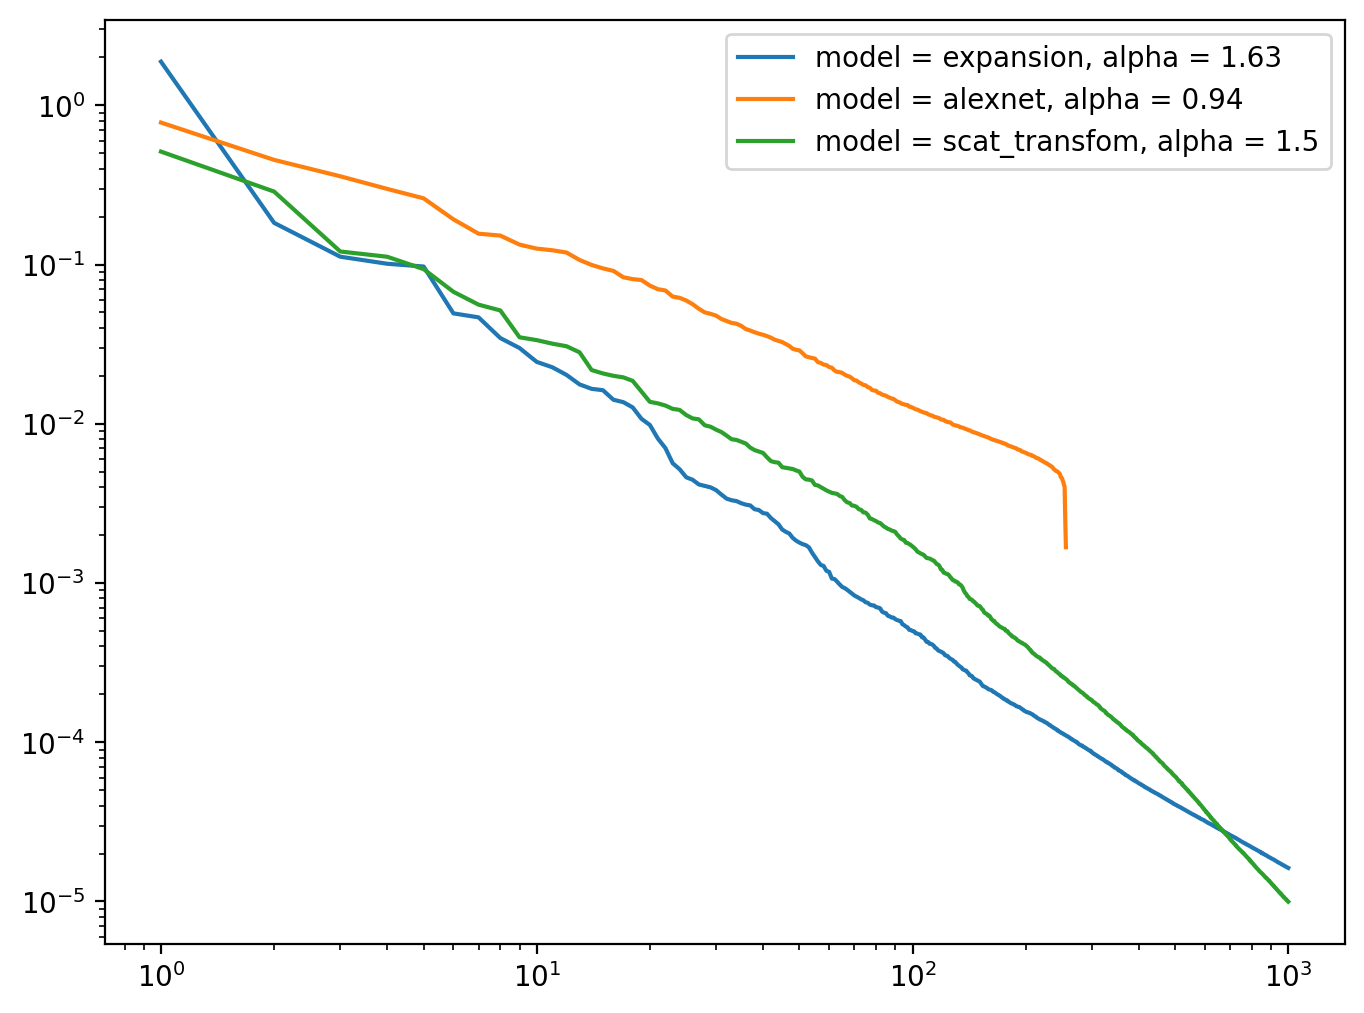

In [58]:
models = ['expansion_model_3_layers_10000_features_principal_components_naturalscenes',
          'alexnet_conv5_5_layers_256_features_naturalscenes_principal_components',
          'scat_transform_J=3_L=4_M=224_N=224_gpool=False_naturalscenes_principal_components'
        ]
          
names = ['expansion',
          'alexnet',
          'scat_transfom']

plt.clf()
fig = plt.figure(figsize=(8,6),dpi=200,facecolor='white')
for i in range(len(models)):
    
    file_path = f'/data/atlas/.cache/pca/{models[i]}'
    with open(file_path, 'rb') as f:
        pca = pickle.load(f)
    plot_eigspec(pca.explained_variance_[:1000], names[i])
    
plot_eigspec(rescaled_pcs.squeeze()[:1000], 'rescaled_pcs') 
plot_ref(pca.explained_variance_[:1000])
plt.savefig(f'eig_spec_comparison.png', bbox_inches='tight', dpi=100) 

In [28]:
rescaled_pcs[0,:].shape

(1000,)

In [23]:
pca.explained_variance_[:1000].shape

(1000,)

In [31]:
file_path = '/data/atlas/.cache/pca/alexnet_conv5_5_layers_256_features_majajhong'
with open(file_path, 'rb') as f:
    pca = pickle.load(f)
layers = ['last']
title = 'test'
plot_eigspec(pca.explained_variance_[:200], layers, title)

TypeError: plot_eigspec() missing 1 required positional argument: 'title'